In [2]:
include("../AR/utils/utils.jl")
include("../AR/utils/Structure.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"

"../mystations/"

TN temperatures and dates

In [3]:
TN_temp_Montpellier = initTN(commonpath * "TN_Montpellier.txt")
TN_temp_Bonn = initTN(commonpath * "TN_Bonn.txt")
TN_temp_Nantes = initTN(commonpath * "TN_Nantes.txt")

TN_vecs = [TN_temp_Montpellier.df.TN, TN_temp_Bonn.df.TN, TN_temp_Nantes.df.TN]
dates_vecs_TN = [TN_temp_Montpellier.df.DATE, TN_temp_Bonn.df.DATE, TN_temp_Nantes.df.DATE]

3-element Vector{Vector{Date}}:
 [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2022-12-22"), Date("2022-12-23"), Date("2022-12-24"), Date("2022-12-25"), Date("2022-12-26"), Date("2022-12-27"), Date("2022-12-28"), Date("2022-12-29"), Date("2022-12-30"), Date("2022-12-31")]
 [Date("1976-11-01"), Date("1976-11-02"), Date("1976-11-03"), Date("1976-11-04"), Date("1976-11-05"), Date("1976-11-06"), Date("1976-11-07"), Date("1976-11-08"), Date("1976-11-09"), Date("1976-11-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")]
 [Date("1992-01-01"), Date("1992-01-02"), Date("1992-01-03"), Date("1992-01-04"), Date("1992-01-05"), Date("1992-01-06"), Date("1992-01-07"), Date("1992-01-08

## Generated data on apple model

Phenology of apple with generated data from a model trained on Montpellier records

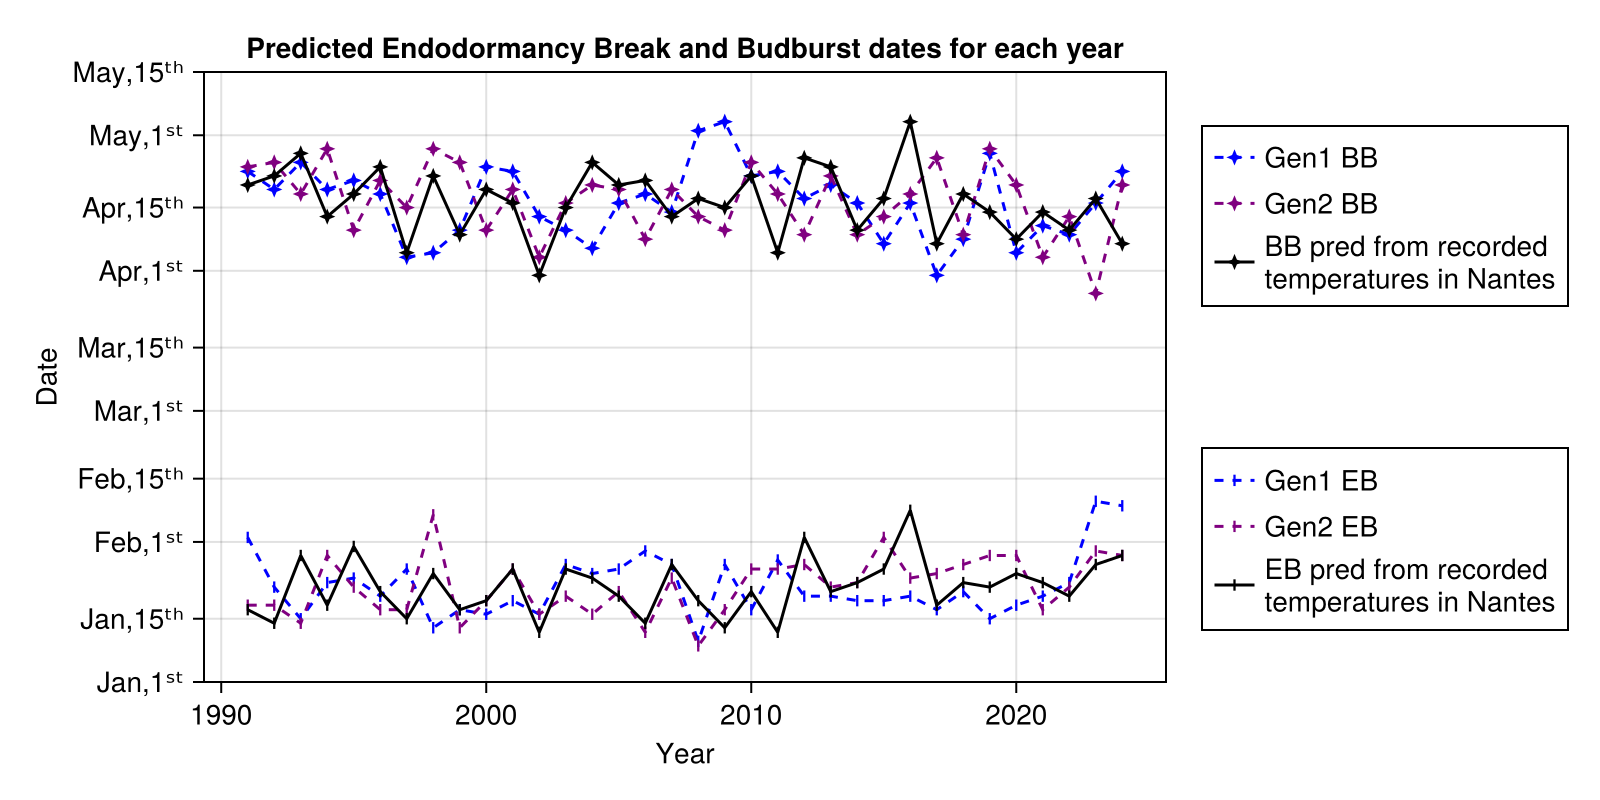

CairoMakie.Screen{IMAGE}


In [4]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Nantes.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_AR(x, date_vec)
x_vec = rand(ARmodel, 2, date_vec)

DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig = Plot_Pheno_Dates_DB_BB([Tab[1, :]; [DB_Nantes]],
    [Tab[2, :]; [BB_Nantes]],
    (10, 30),
    DB_label=[["Gen$(i) EB" for i in 1:2]; "EB pred from recorded\ntemperatures in Nantes"],
    DB_colors=colors,
    BB_label=[["Gen$(i) BB" for i in 1:2]; "BB pred from recorded\ntemperatures in Nantes"],
    BB_colors=colors,
    dashindexes=[1, 2])
save("Presentation/3phenos.pdf", fig, ; px_per_unit=2.0)
display(fig)

Montpellier

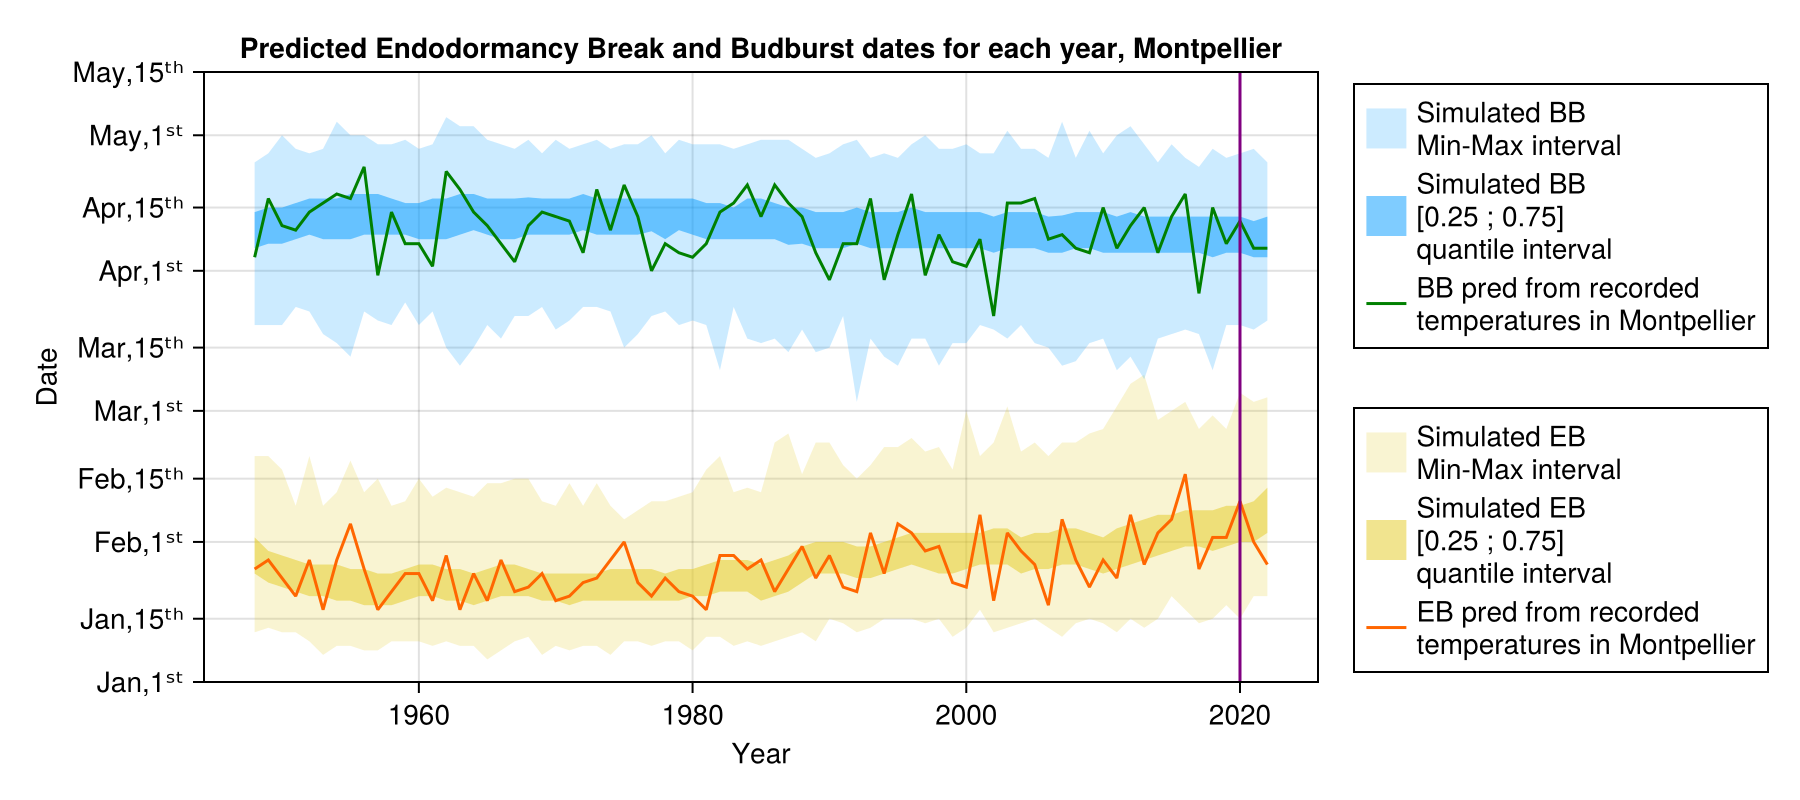

CairoMakie.Screen{PDF}


In [5]:
include("PhenoPlot.jl")
include("../AR/utils/Structure.jl")
cd(@__DIR__)
file = [commonpath * "/" * typedata * "_Montpellier.txt" for typedata in ["TN", "TG"]]
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(view(x,:,2), date_vec)

ARmodel = load_model("MontpellierTN_TG_p5_k2.jld2")
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Apple_Phenology_Pred(view(x_hat,:,2), date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Montpellier, BB_Montpellier, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    YearCut=2020
)
display(fig)
save("Presentation/Montpellier_sim.pdf", fig, ; px_per_unit=2.0)

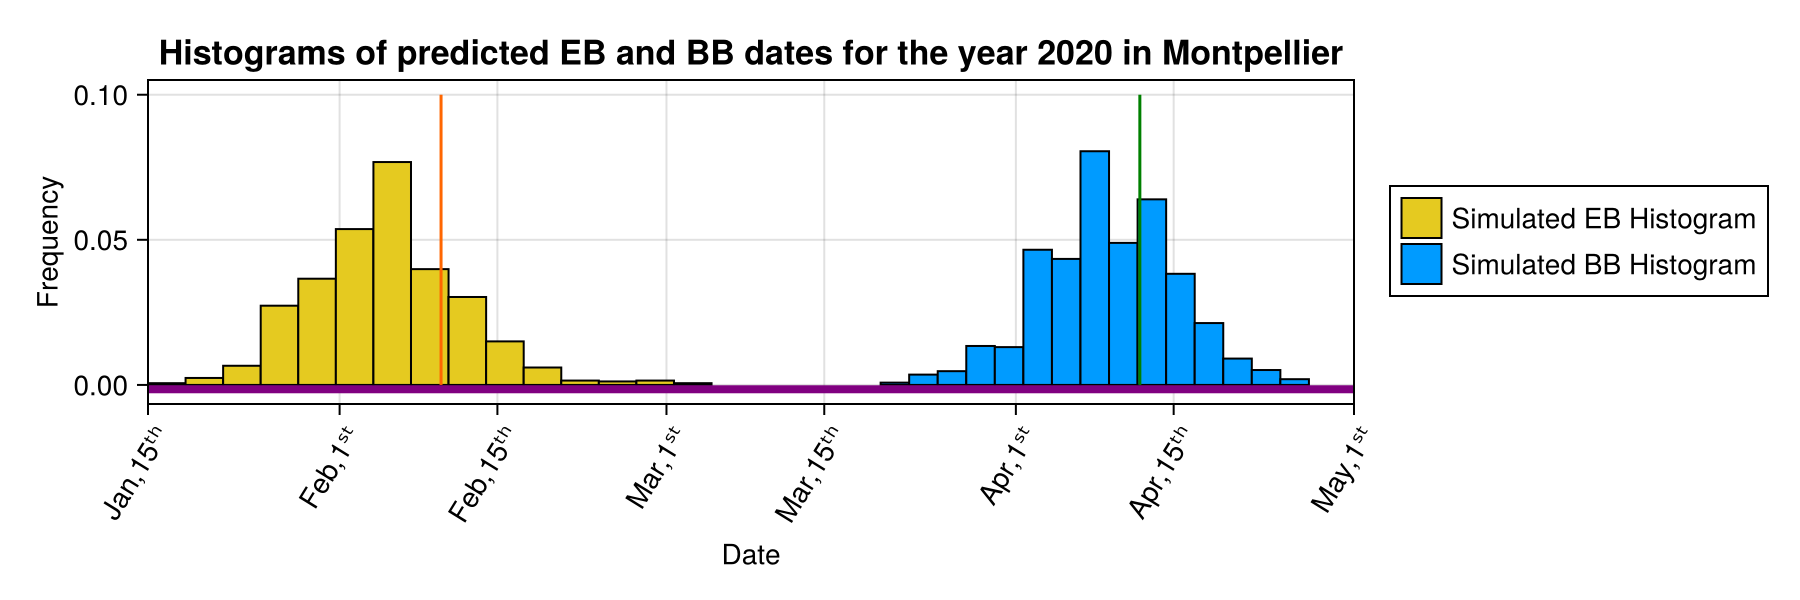

CairoMakie.Screen{PDF}


In [6]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Montpellier, BB_Montpellier, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    LineHeight=0.1
)
display(fig)
save("Presentation/Montpellier2020.pdf", fig, ; px_per_unit=2.0)

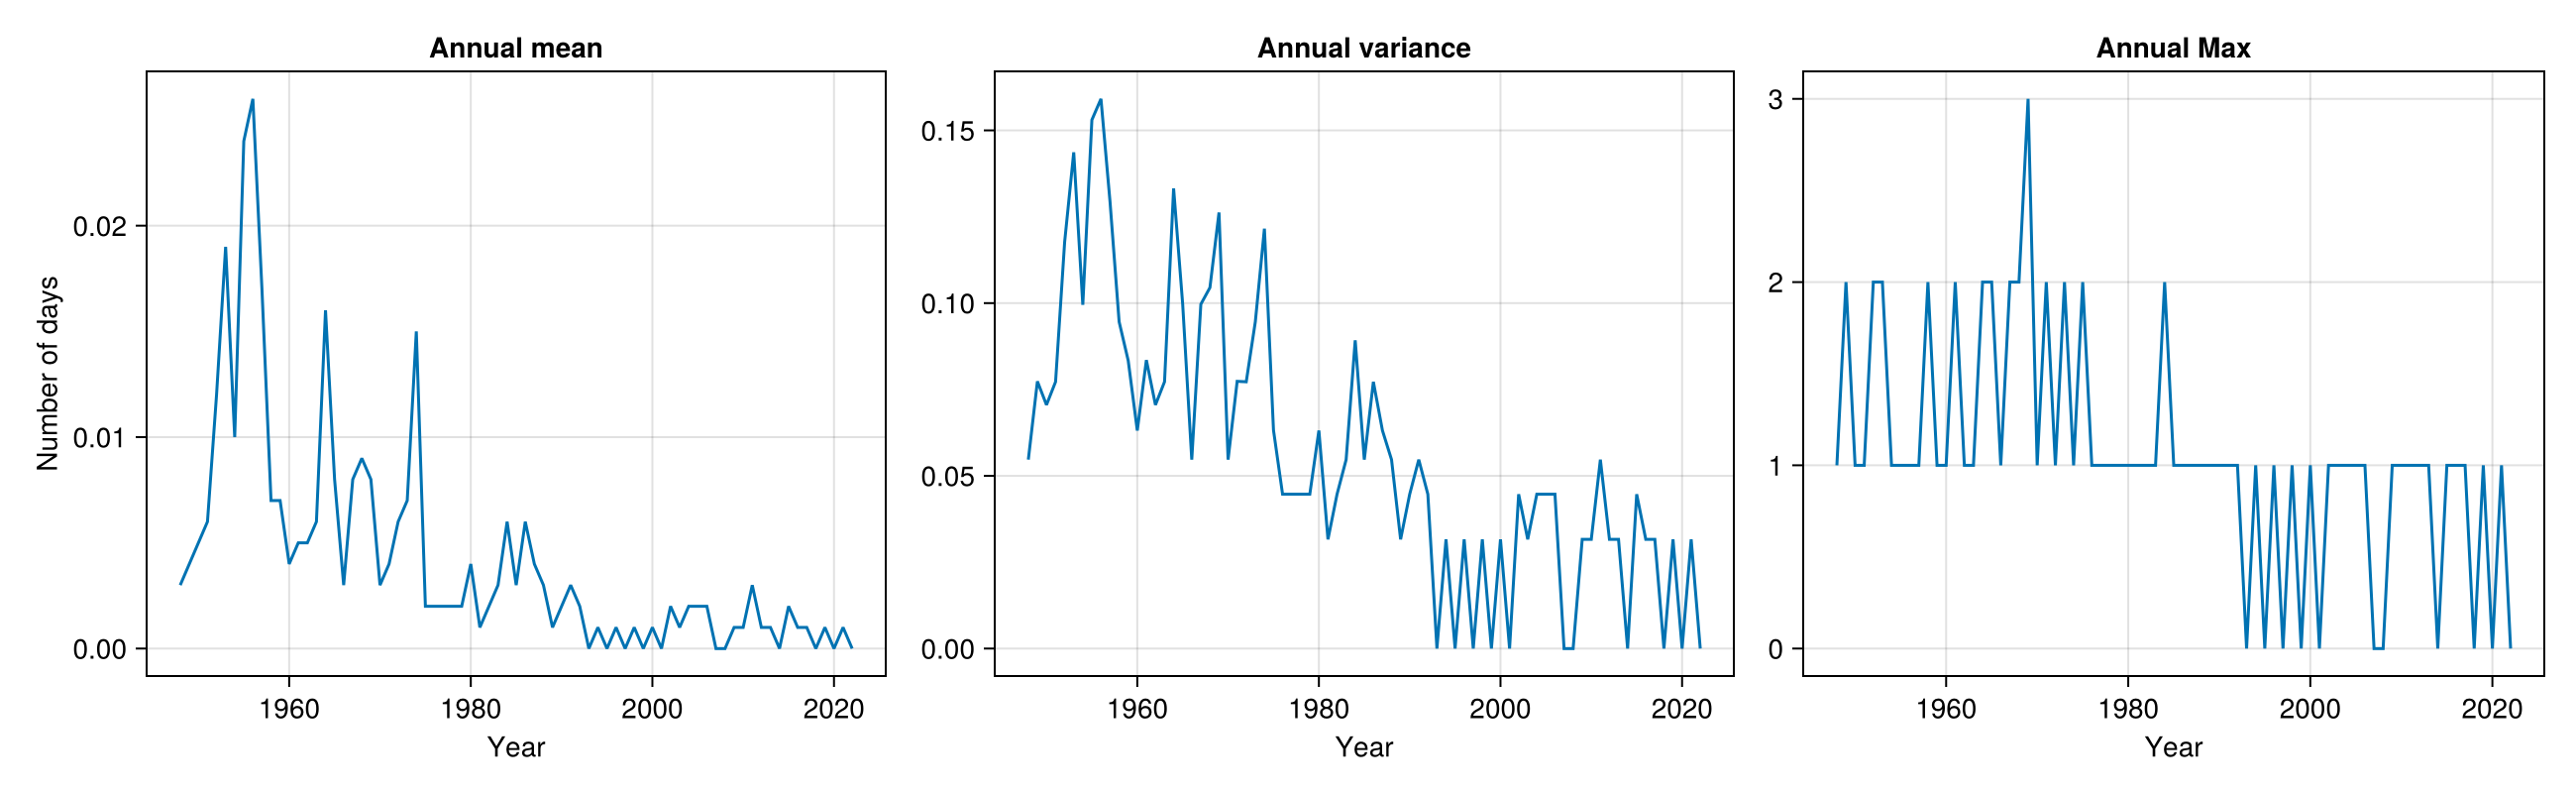

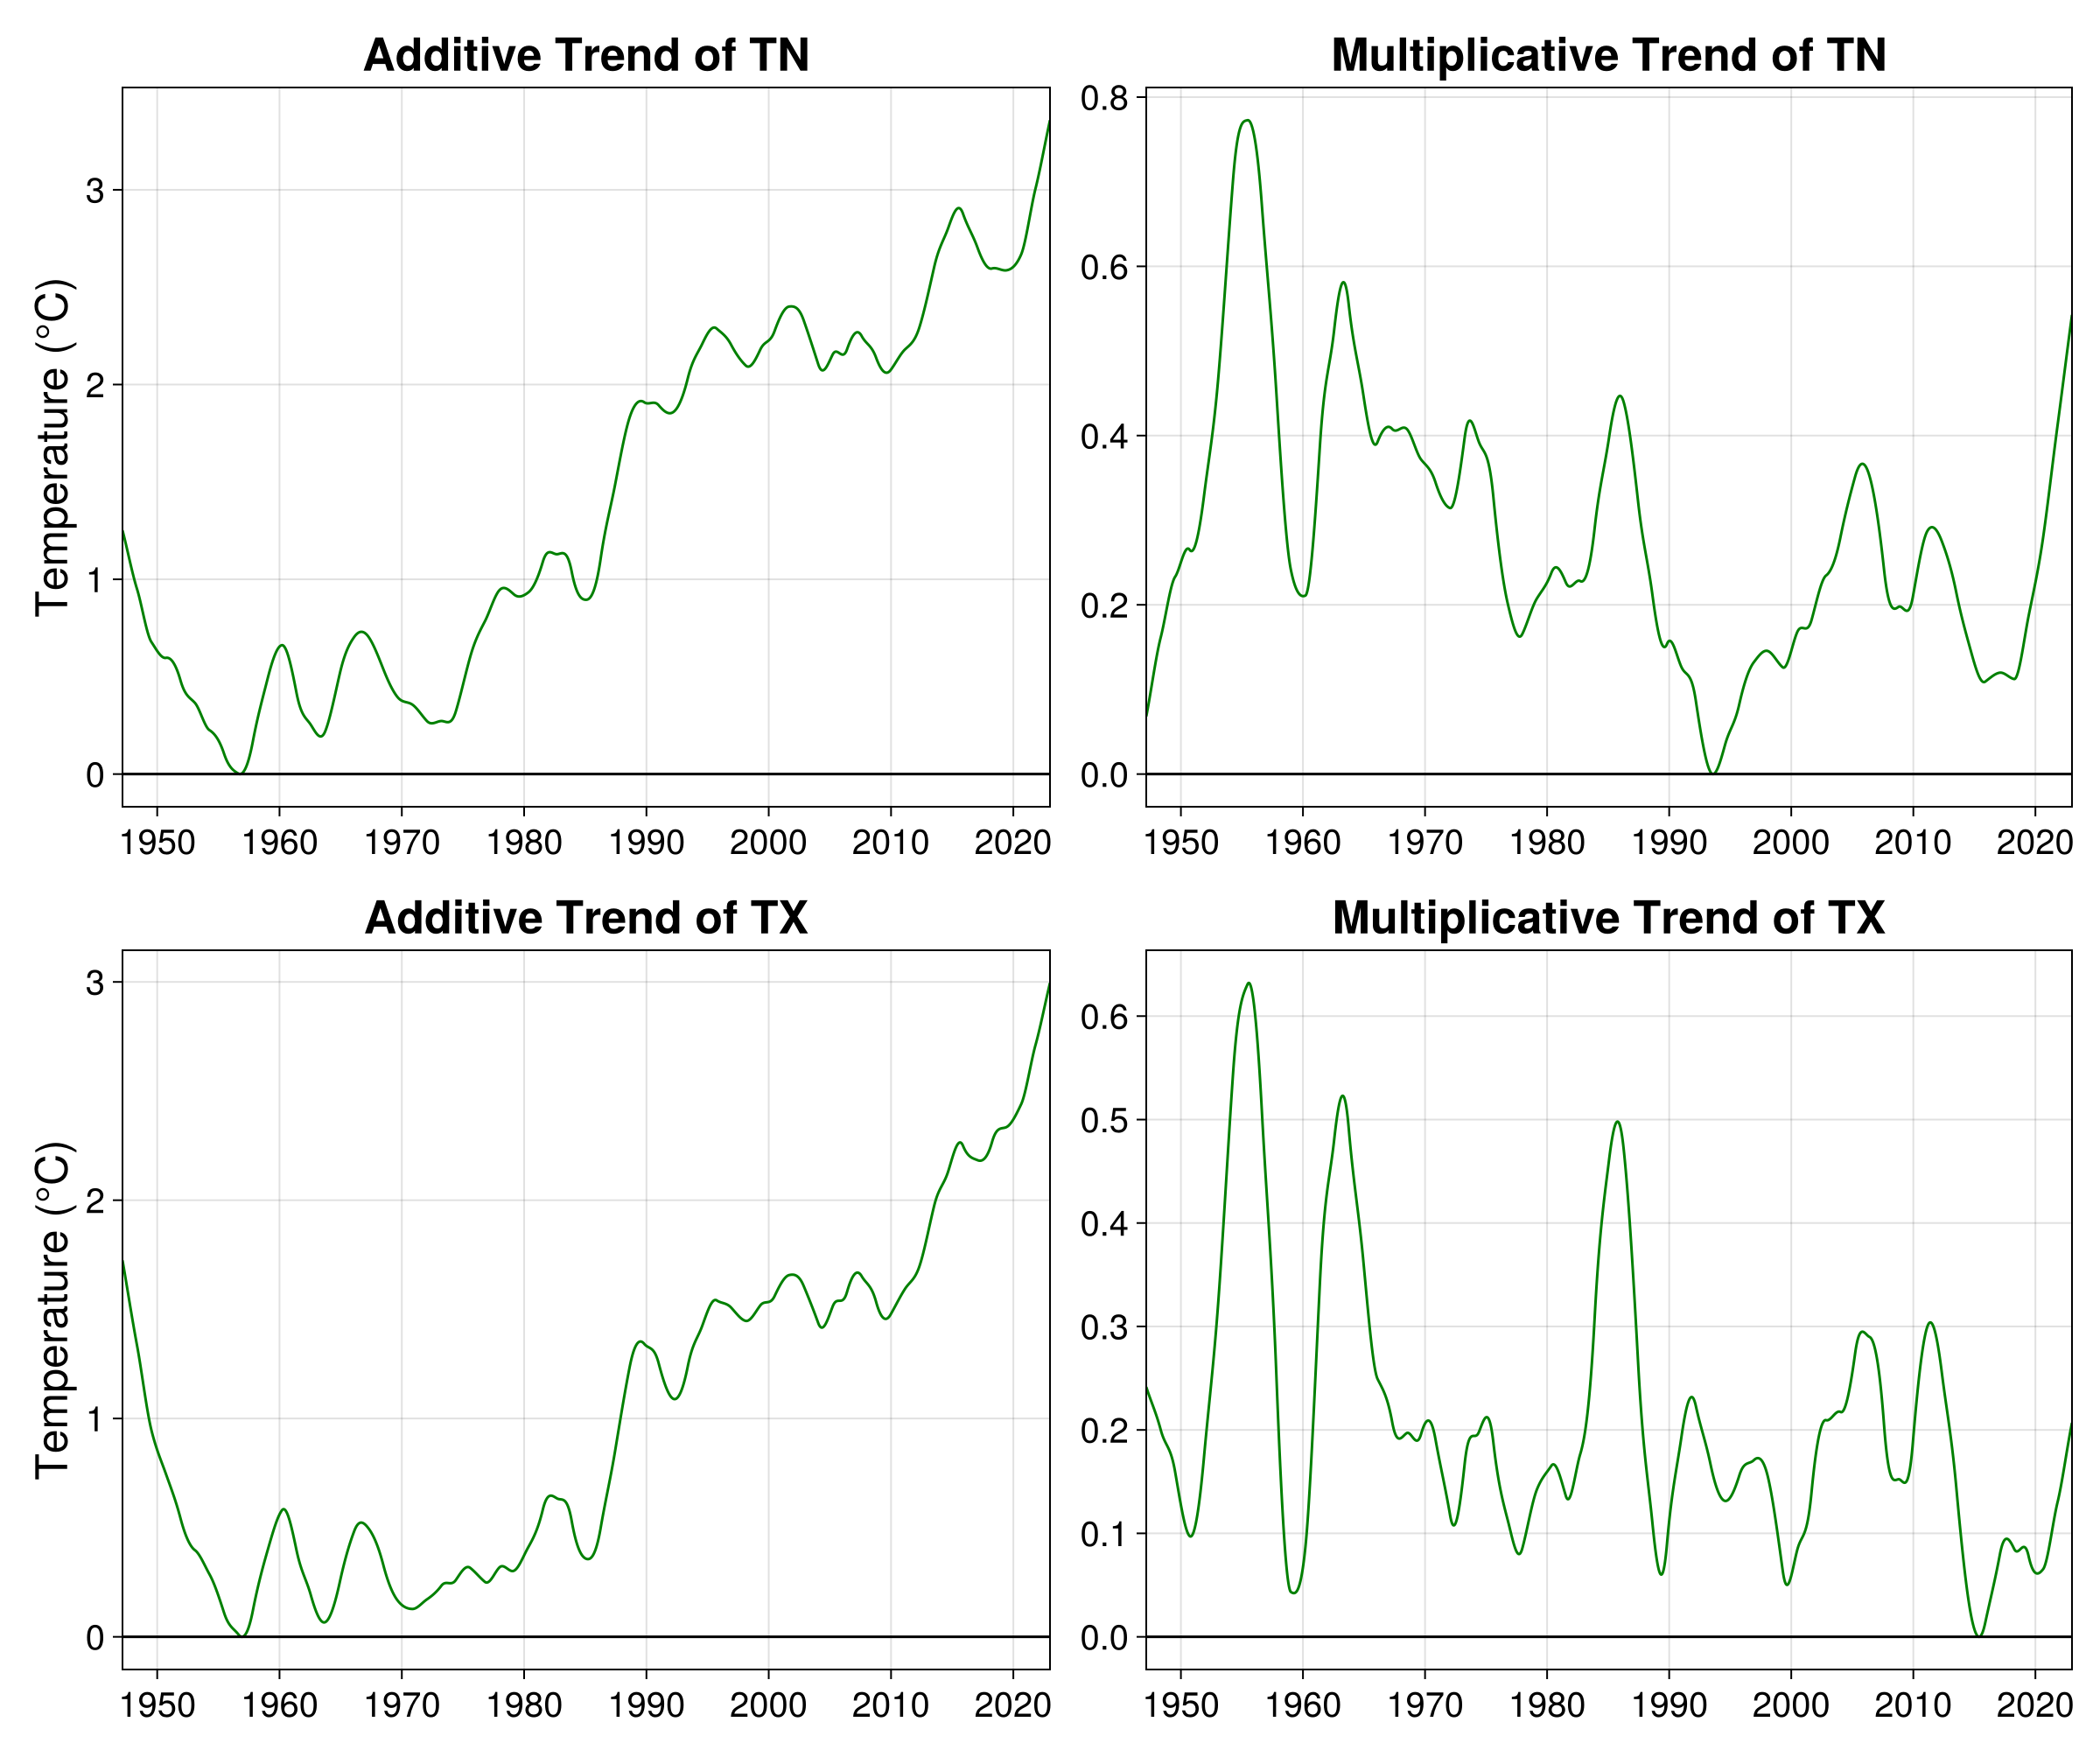

CairoMakie.Screen{IMAGE}


In [7]:
display(Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB))
display(PlotTrend(ARmodel))

Bonn

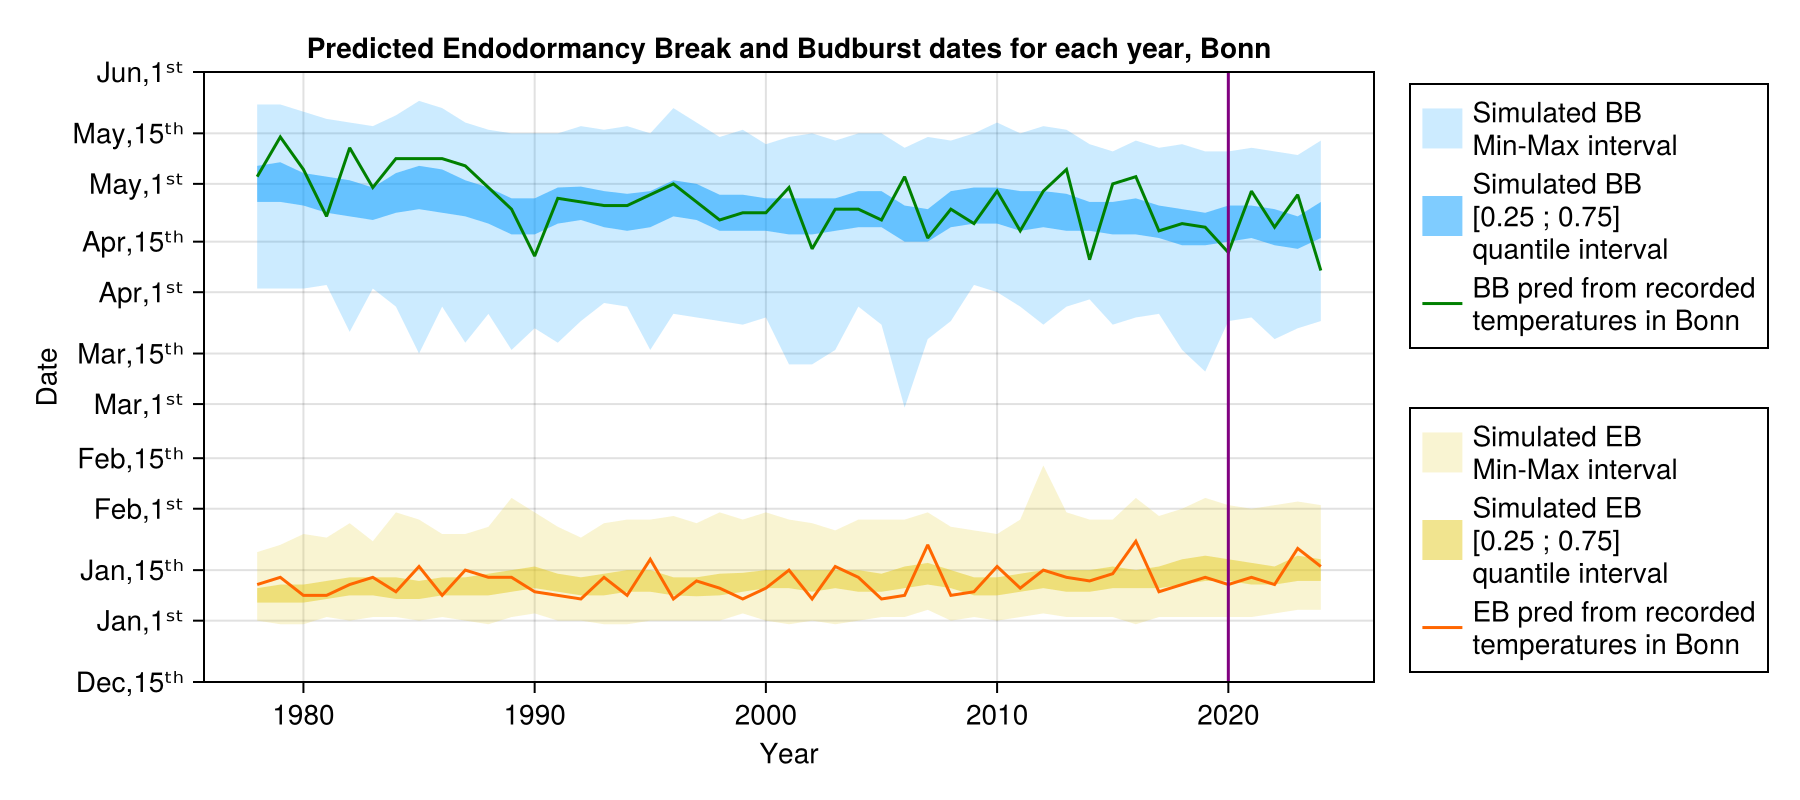

CairoMakie.Screen{PDF}


In [8]:
include("PhenoPlot.jl")
cd(@__DIR__)
file = [commonpath * "/" * typedata * "_Bonn.txt" for typedata in ["TN", "TG"]]
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

DB_Bonn, BB_Bonn = Apple_Phenology_Pred(view(x,:,2), date_vec)

ARmodel = load_model("BonnTN_TG_p5_k2.jld2")
x_vec = rand(ARmodel, 1000, date_vec)

Tab = [Apple_Phenology_Pred(view(x_hat,:,2), date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Bonn, BB_Bonn, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    YearCut=2020
)
display(fig)
save("Presentation/Bonn_sim.pdf", fig, ; px_per_unit=2.0)


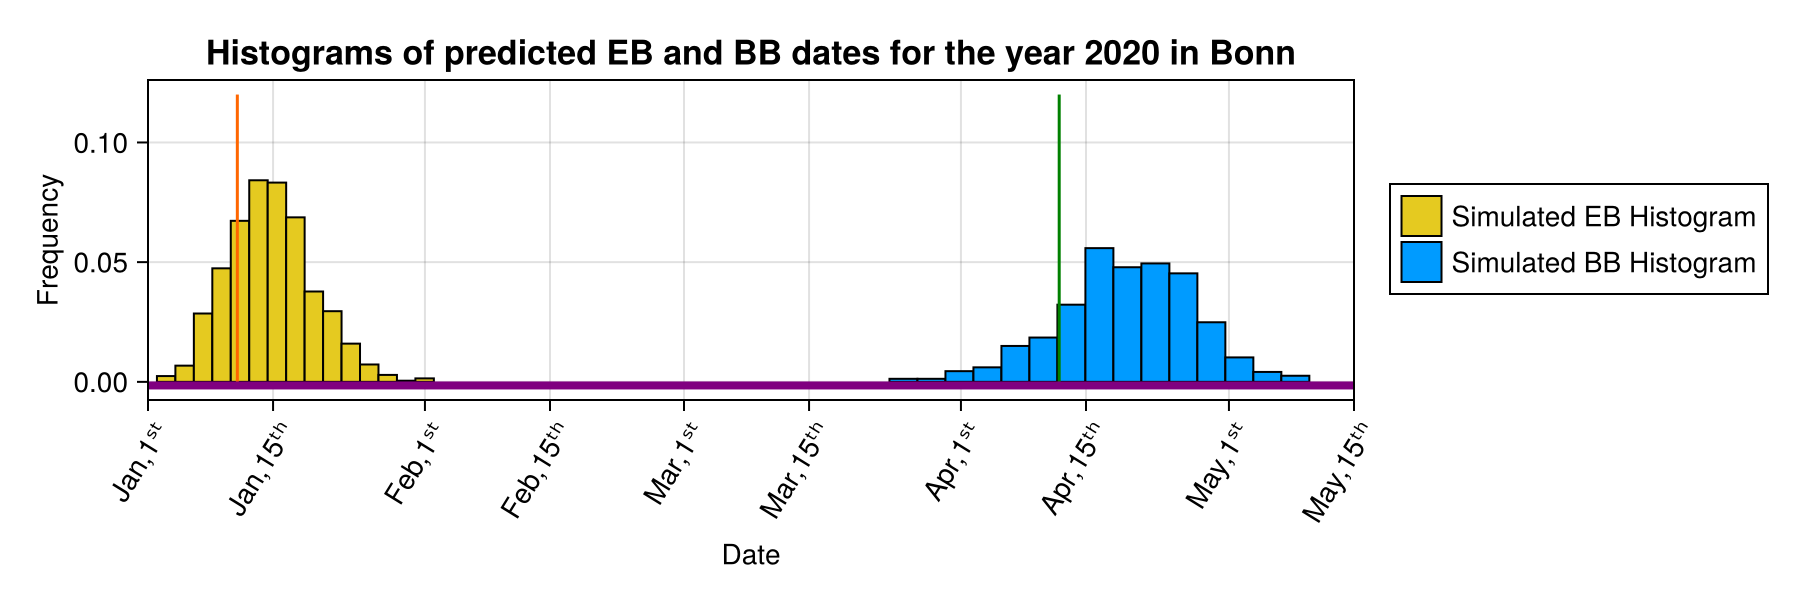

CairoMakie.Screen{PDF}


In [9]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Bonn, BB_Bonn, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    LineHeight=0.12
)
display(fig)
save("Presentation/Bonn2020.pdf", fig, ; px_per_unit=2.0)

In [10]:
# series = extract_series(commonpath * "TN_Bonn.txt")
# series = truncate_MV(series, "TN")

# fig = Plot_Freeze_Risk_Bar(series.TN, series.DATE, BB_Bonn,
#     color="orange",
#     label="Bonn")

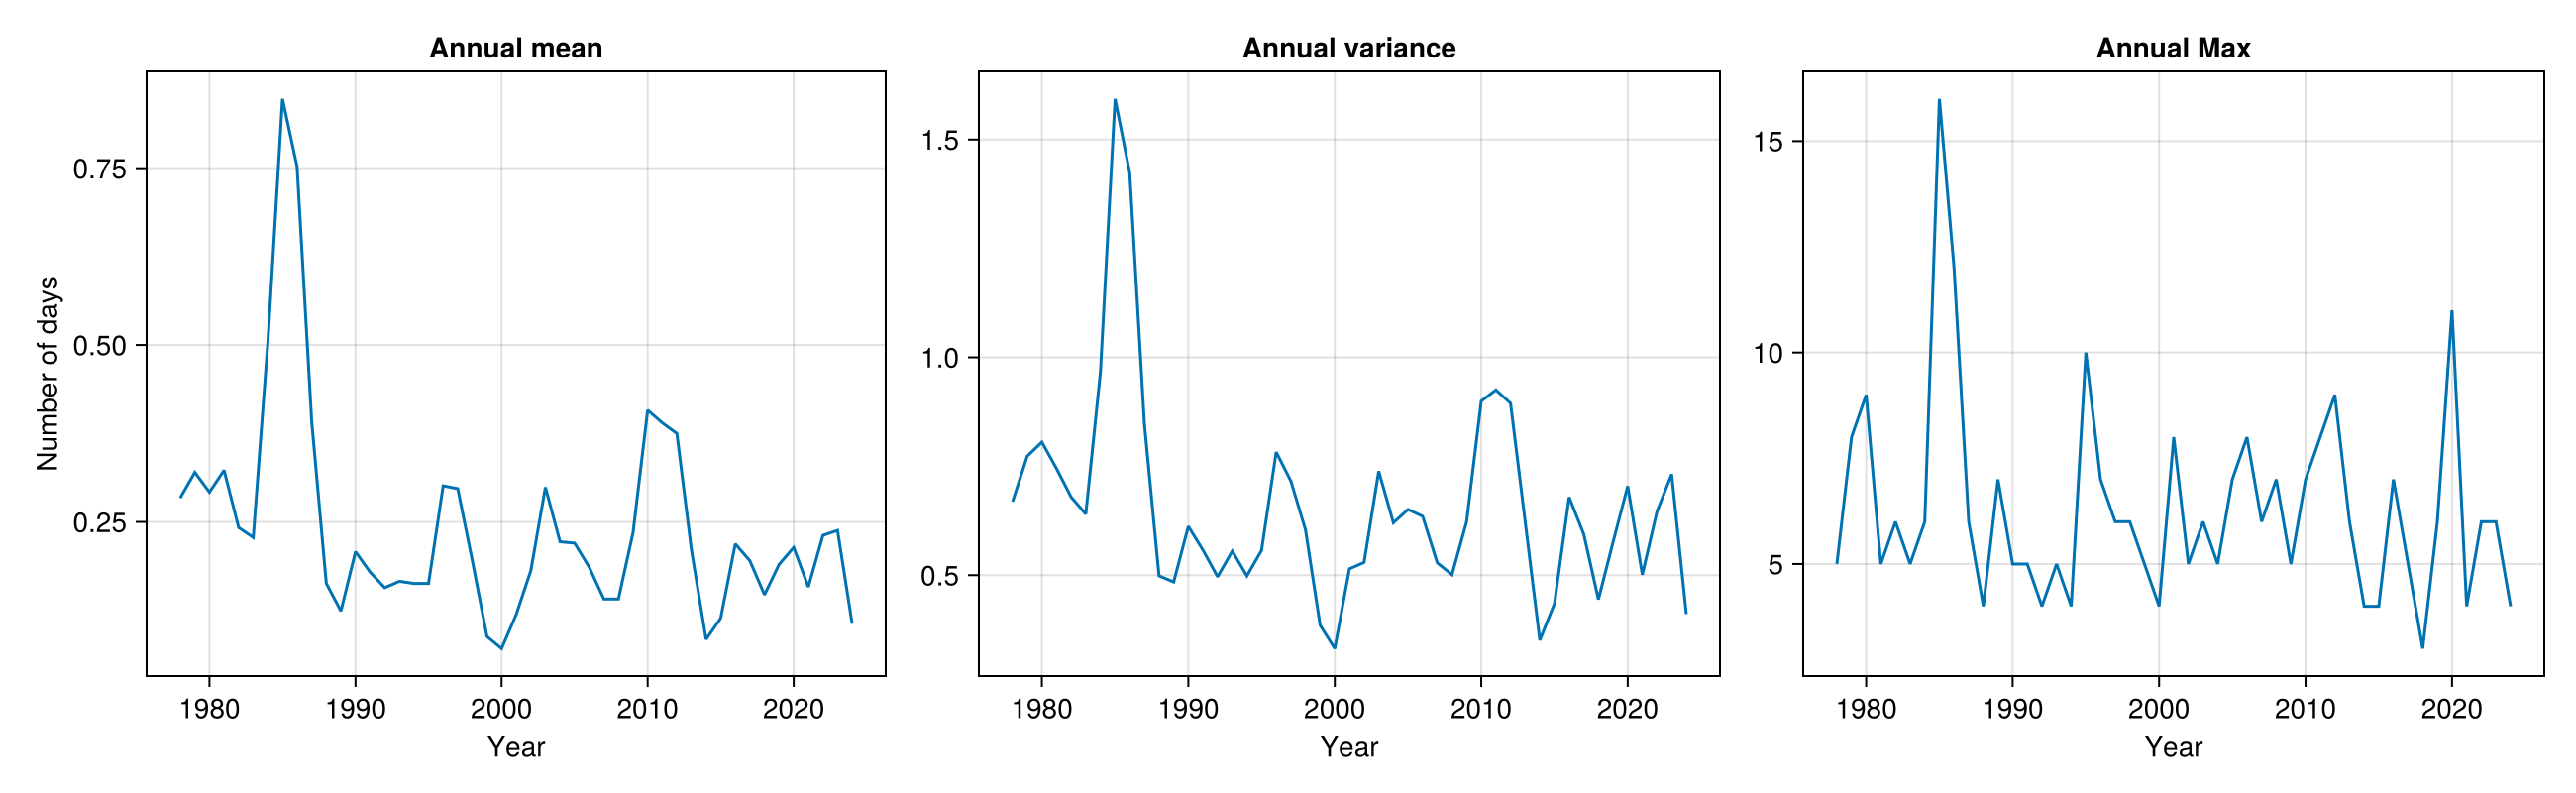

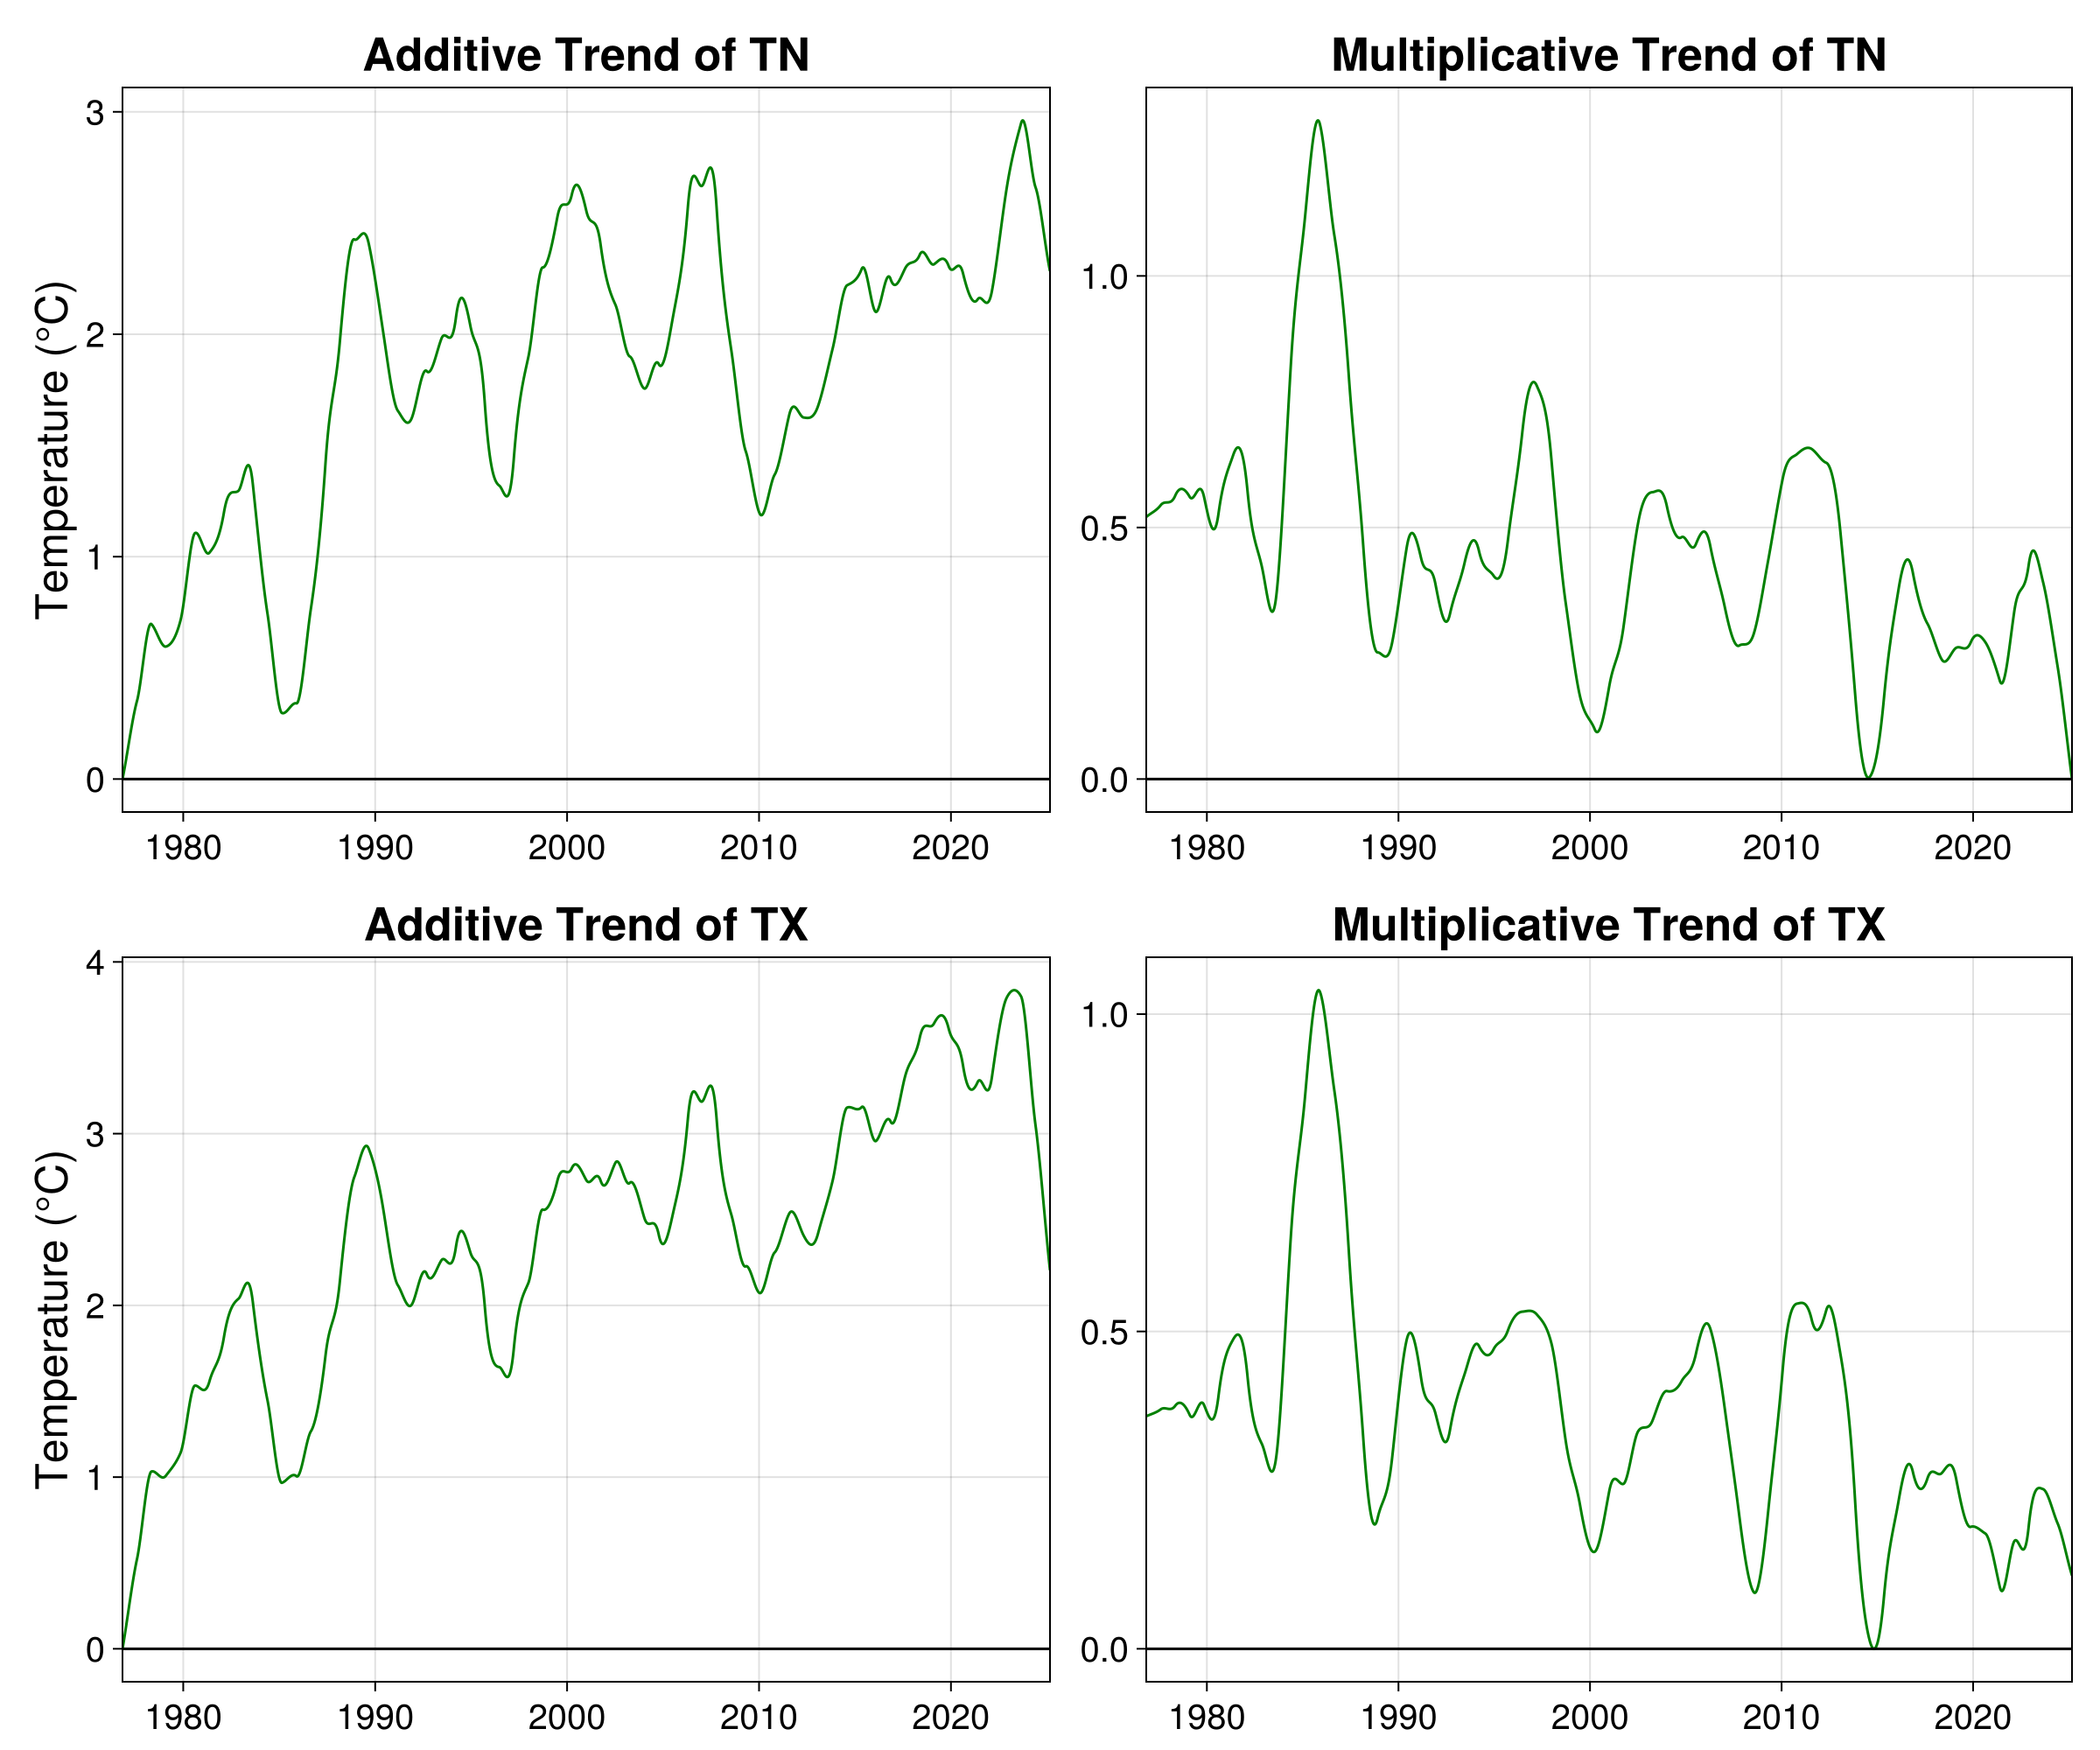

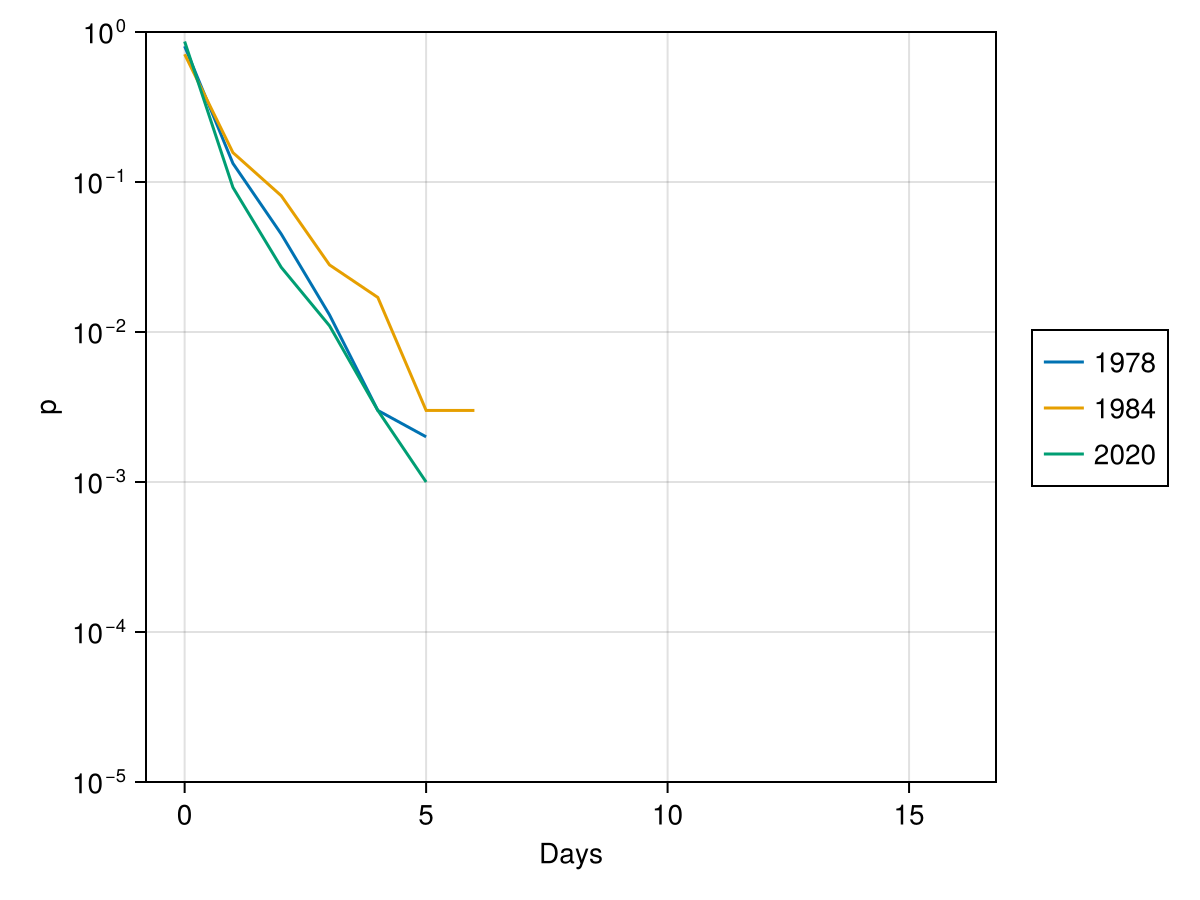

CairoMakie.Screen{IMAGE}


In [ ]:
display(Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB))
display(PlotTrend(ARmodel))

Nantes

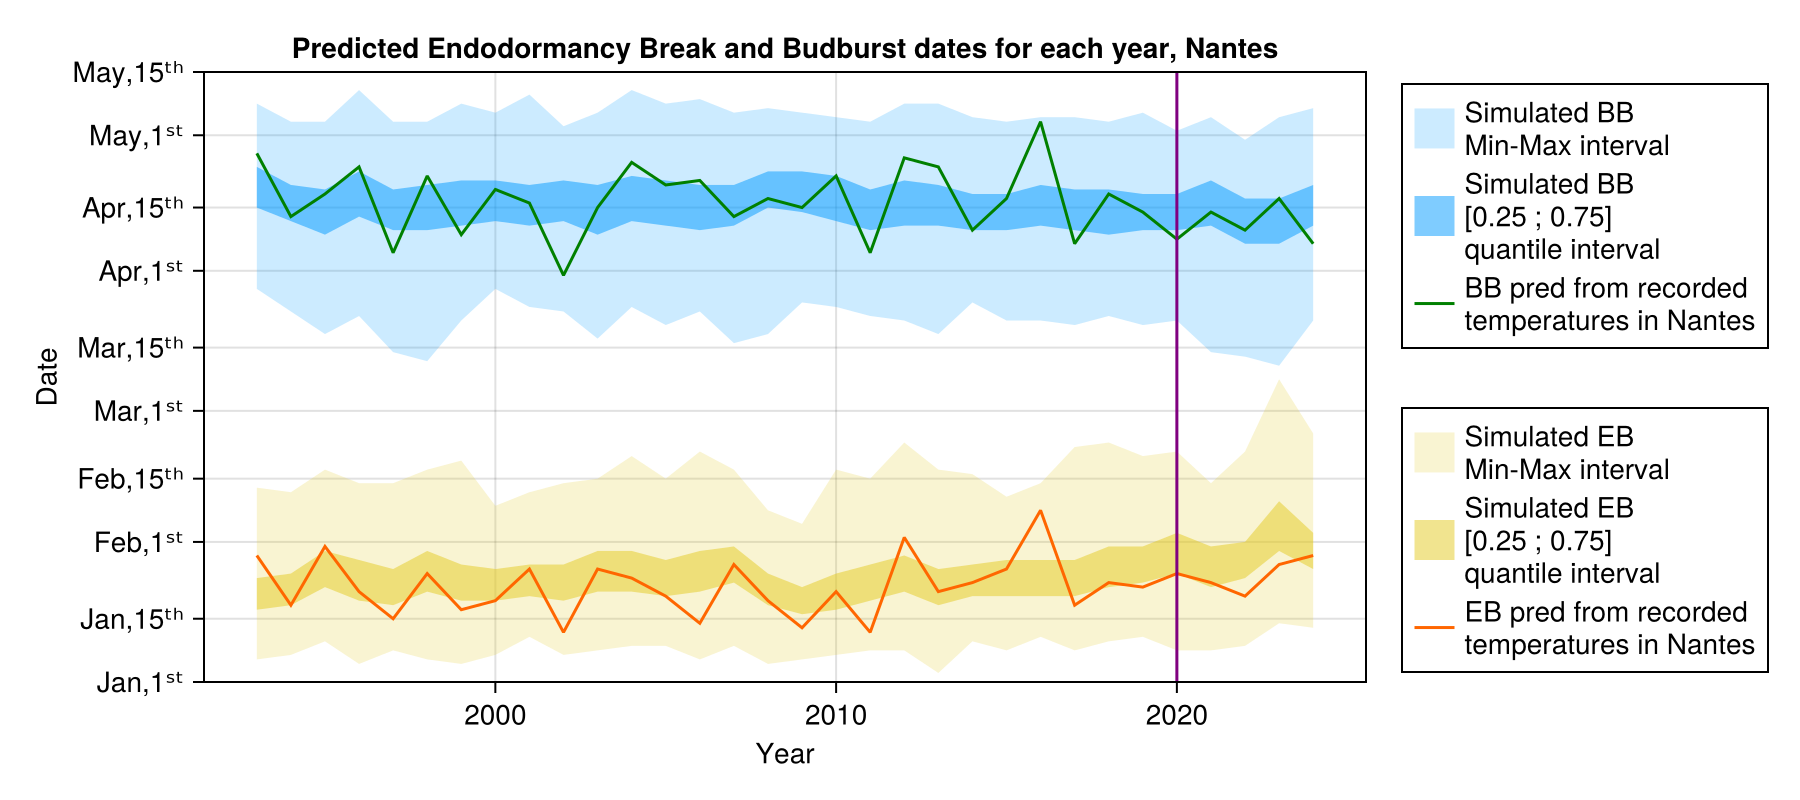

CairoMakie.Screen{PDF}


In [12]:
include("PhenoPlot.jl")
file = [commonpath * "/" * typedata * "_Nantes.txt" for typedata in ["TN", "TG"]]
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

DB_Nantes, BB_Nantes = Apple_Phenology_Pred(view(x,:,2), date_vec)

ARmodel = load_model("NantesTN_TG_p3_k2.jld2")
x_vec = rand(ARmodel, 1000, date_vec)


Tab = [Apple_Phenology_Pred(view(x_hat,:,2), date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes, BB_Nantes, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    YearCut=2020
)
display(fig)
save("Presentation/Nantes_sim.pdf", fig; px_per_unit=2.0)

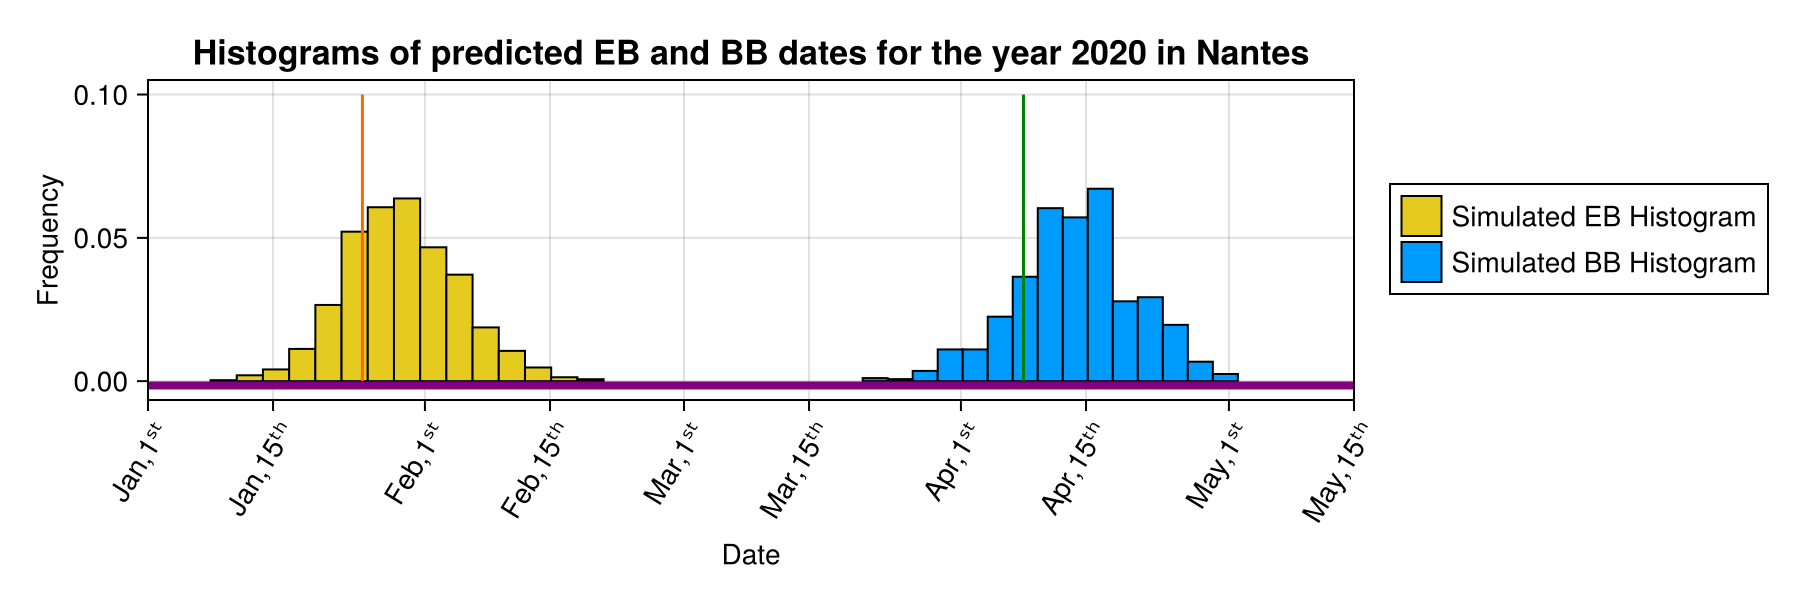

CairoMakie.Screen{PDF}


In [13]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Nantes, BB_Nantes, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    LineHeight=0.1
)
display(fig)
save("Presentation/Nantes2020.pdf", fig, ; px_per_unit=2.0)

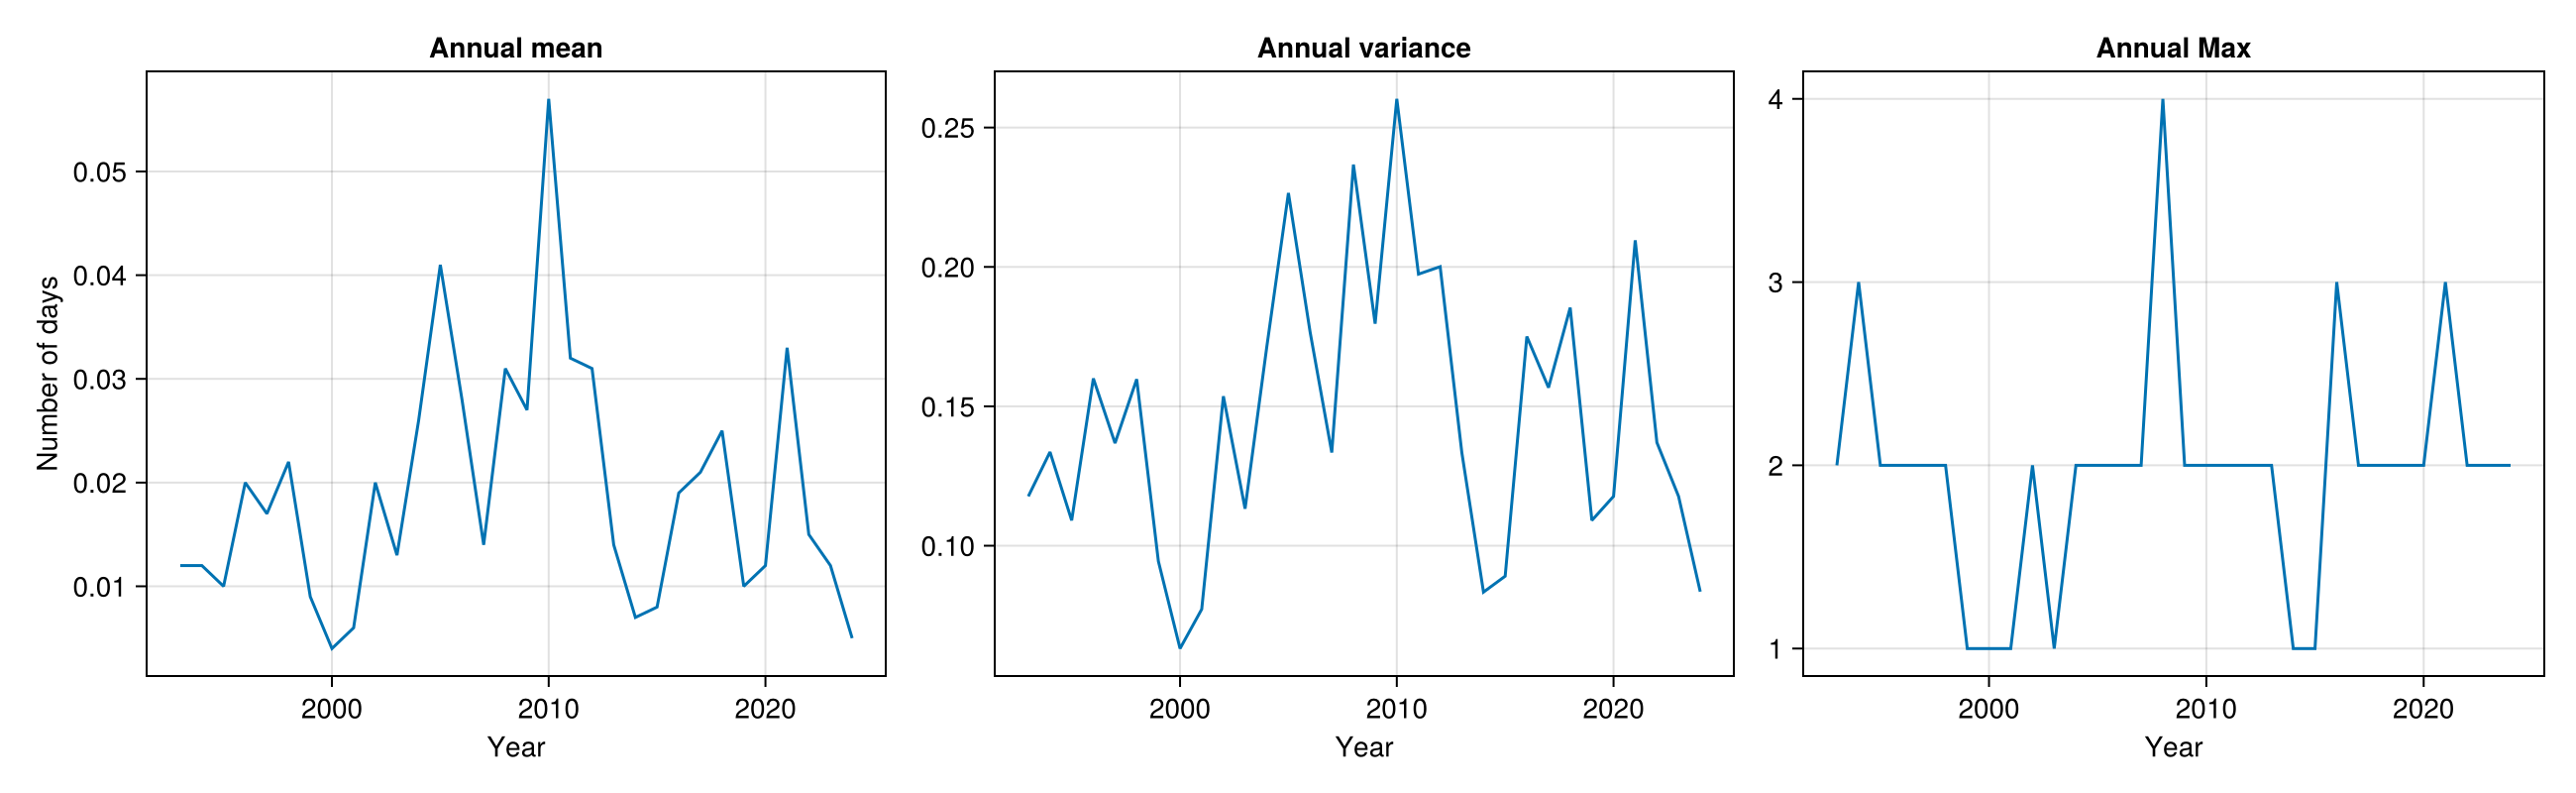

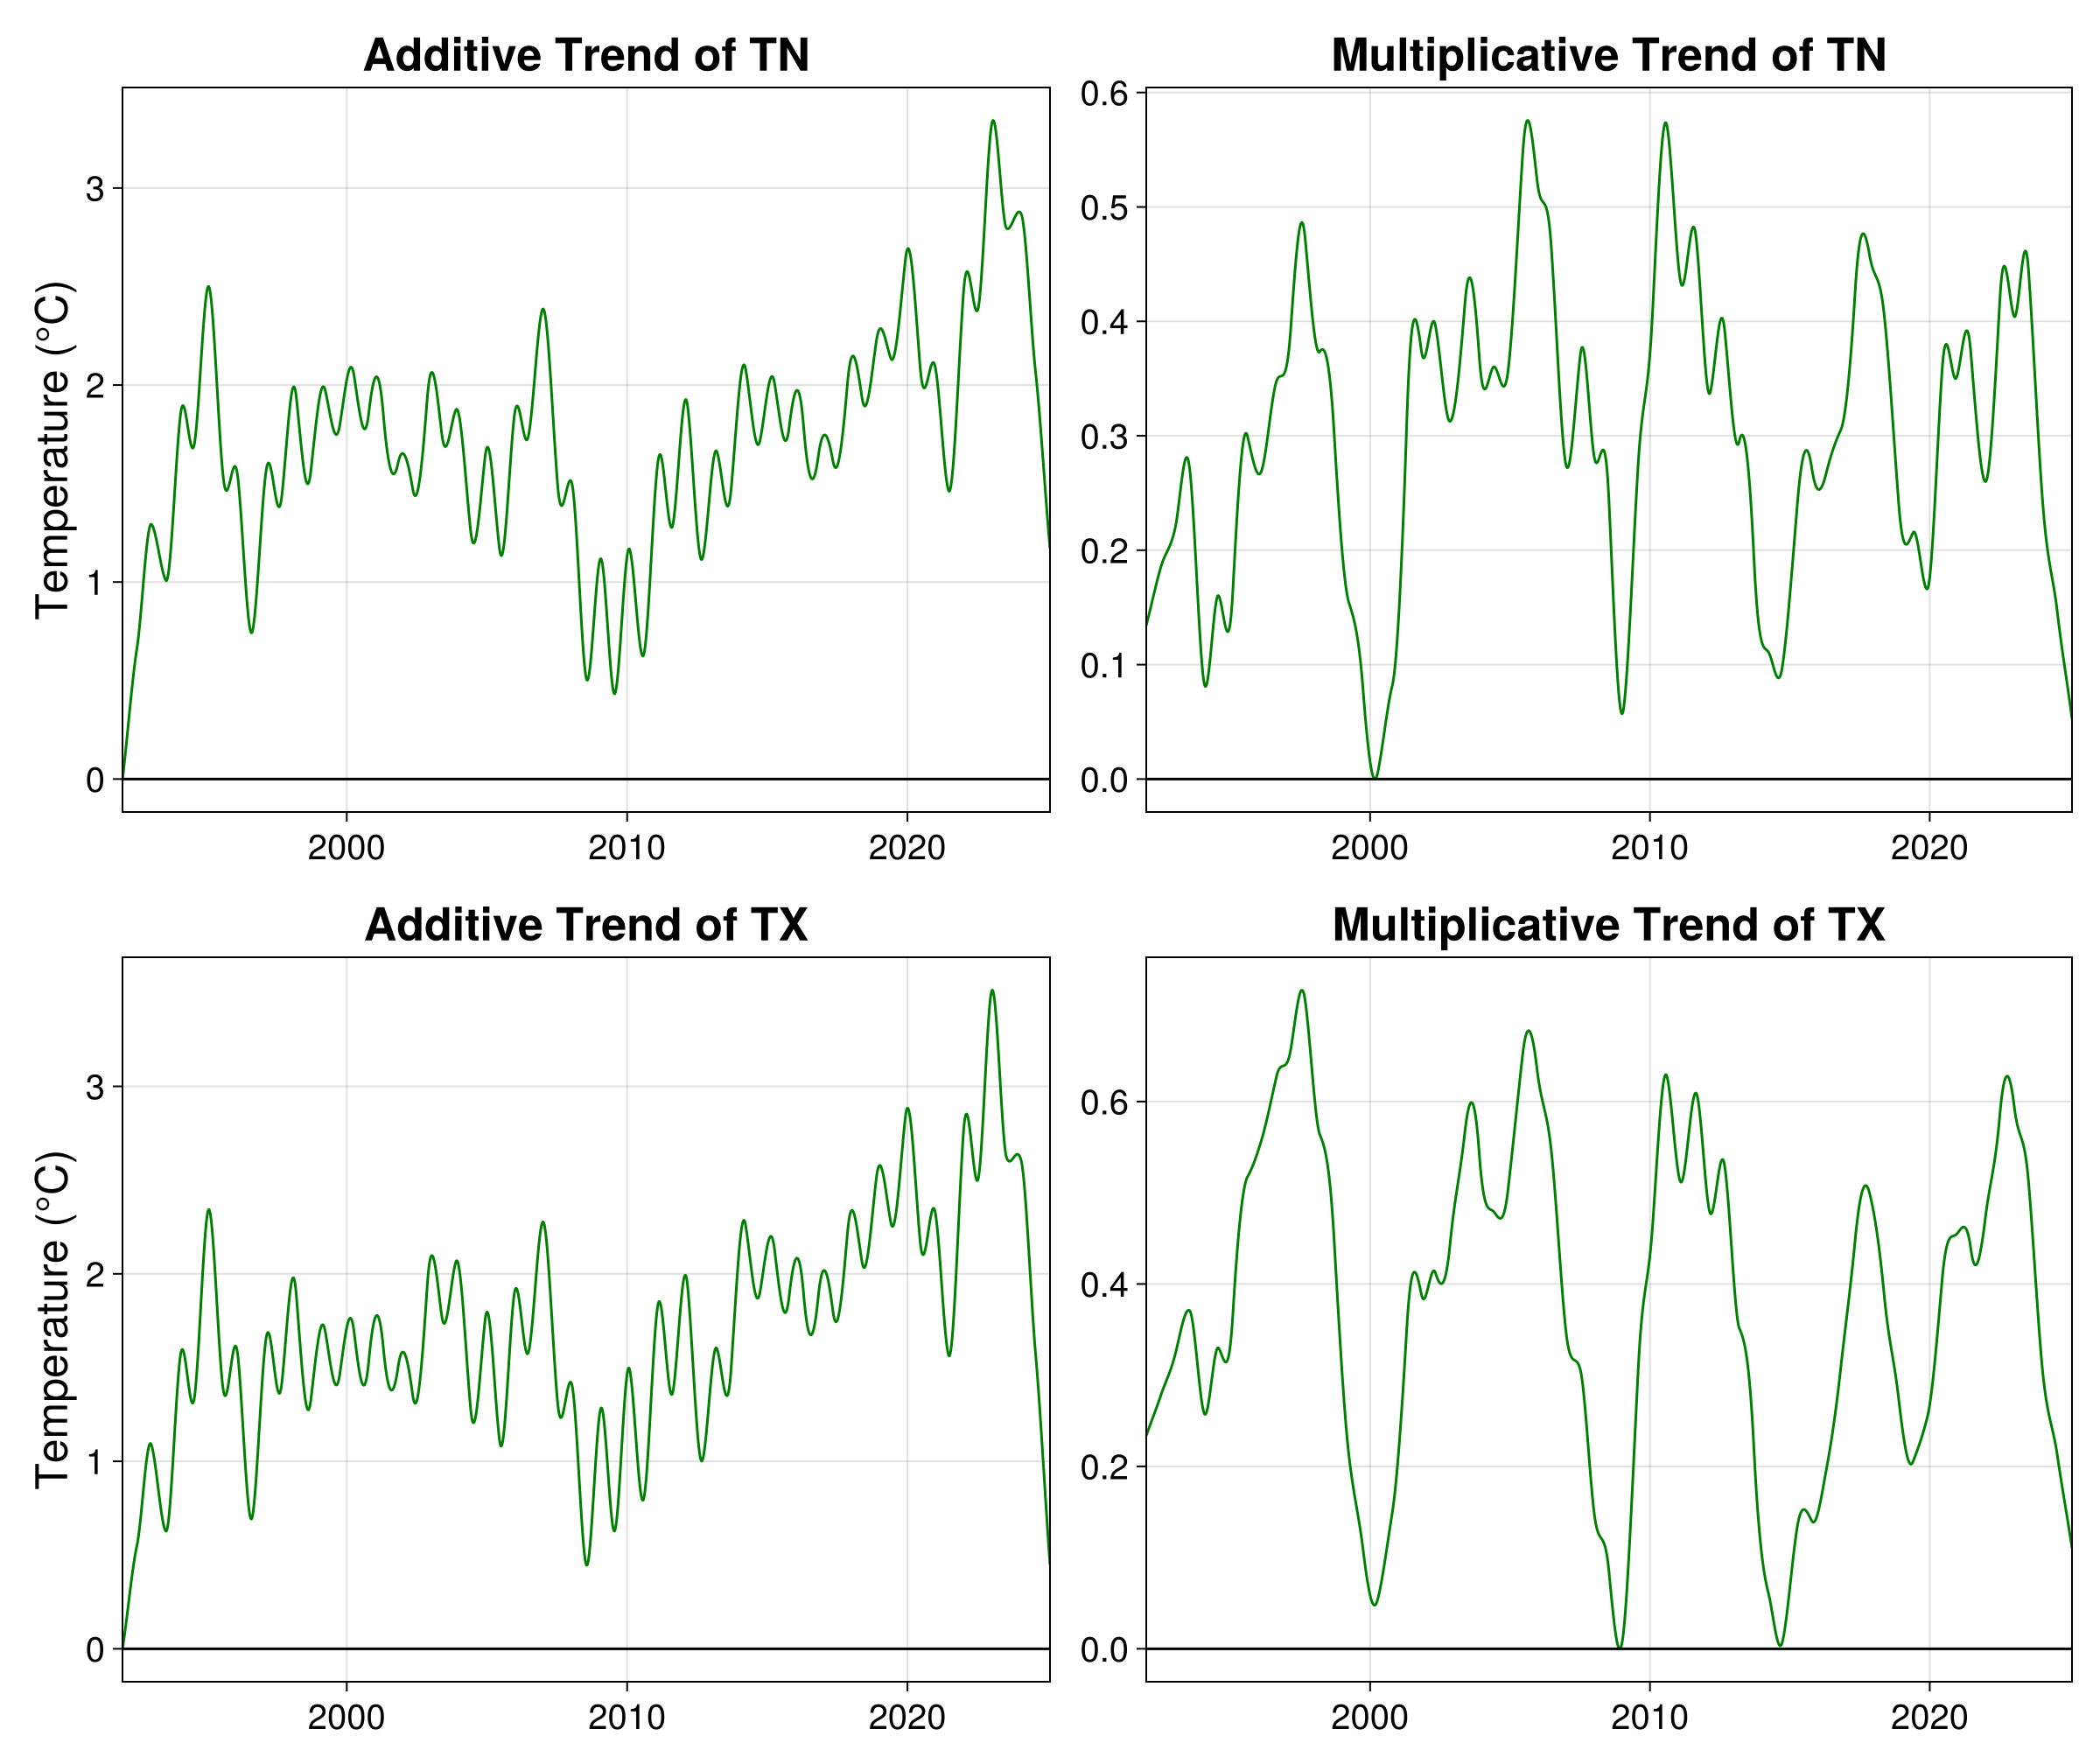

ArgumentError: ArgumentError: invalid index: nothing of type Nothing

In [ ]:
display(Plot_Freeze_Risk_sample([view(x_hat,:,1) for x_hat in x_vec],date_vec,Set_BB))
display(PlotTrend(ARmodel))